## The Convex Hull ##

The convex hull is one of the simplest computational geometry algorithms. In two dimensional space, it is defined as the smallest convex polygon that contains a set of points. This can also be extended to three dimensions where it becomes the smallest convex polyhedron that contains a set of points in space.

There are many problems that a convex hull can be applied to, one of the most well known is robot motion planning. Helping to guide a robot past obstacles without hitting them.

The code to compute the convex hull does not require any additional modules to be imported. The randrange function is used to generate a set of points to test the convex hull algorithm and matplotlib is used to display the result.


In [1]:
from random import randrange
from matplotlib import pyplot as plt

Set some initial parameters including the size of the area (in pixels) within which to generate points, and the number of points to add. The min and max x, y values are used to create a border so that points aren't placed at the edge of the image. This is just to make it easier to view.

In [13]:
image_x = 600
image_y = 600

min_x = 20
max_x = 580
min_y = 20
max_y = 580

number_of_points = 100

Generate some random points within the area defined, and add these to a list where each point is a dictionary defining an x and y corrdinate.

In [14]:
points = []

for i in range (0, number_of_points):
    x = randrange(min_x, max_x, 1)
    y = randrange(min_y, max_y, 1)
    points.append({'x':x, 'y':y})

Plot the randomly generated points on a chart using matplotlib

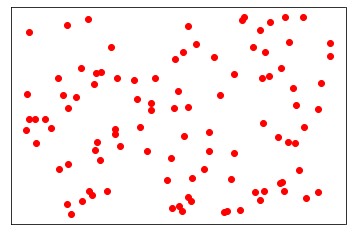

In [15]:
fig = plt.figure()
for point in points:
    plt.plot(point['x'], point['y'], 'ro')
ax = plt.gca()
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)
plt.show()

A useful function to print out the list of points

In [16]:
def print_points_sequence(points_set):
    for point in points_set:
        print('('+str(point['x'])+","+str(point['y'])+')')

This function will iterate through the list of points and display them on the chart and then connect adjacent pairs of points in the hull_points list. The list of points are the vertices of the convex hull.

In [17]:
def draw_hull(hull_points):
    
    fig = plt.figure()
    for point in points:
        plt.plot(point['x'], point['y'], 'ro')
    for i in range(0,len(hull_points)-1):
        start = hull_points[i]
        end = hull_points[i+1]
        x = [start['x'],end['x']]
        y = [start['y'],end['y']]
        plt.plot(x,y,'-',color='blue')
    ax = plt.gca()
    ax.axes.xaxis.set_visible(False)
    ax.axes.yaxis.set_visible(False)

This function will step through a list of points and determine whether 3 adjacent points are co-linear, convex, or concave. Scanning from left to right in increasing value of the x coordinate, 3 points are cocave if it makes a left turn. 
This can easily be determined by computing the cross product of the 3 points

In [18]:
def remove_concavaties(points_set):        
    number_points = len(points_set)
    if number_points > 2:
        for j in range(number_points-1, 1, -1):
            first = points_set[j-2]
            middle = points_set[j-1]
            last = points_set[j]
            cross_product = ((middle['x']-first['x'])*(last['y']-first['y']))-((middle['y']-first['y'])*(last['x']-first['x']))
            if cross_product < 0:
                #Remove the middle of the last 3 points from the list  
                del points_set[j-1]        
    return points_set


Iterate through the points and remove concavities to build either the upper or lower section of the convex hull

In [19]:
def build_hull_section(section, section_range, sorted_points):
    for i in section_range:
        section.append(sorted_points[i])
        section = remove_concavaties(section)
    return section

First, the list of points must be sorted in increasing order of x coordinate value

In [20]:
sorted_points = sorted(points, key=lambda k: k['x']) 
print("Points have been sorted by increasing x value")

number_of_points = len(points)

Points have been sorted by increasing x value


Compute the convex hull in two parts, the upper and then the lower section and join these to form the convex hull. Since there must be a minimum of 3 points to compare, add the first two points to the list and then iteratively add the next point in increasing x coordinate value, checking at each stage whether this creates a concave shape.

In [21]:
upper = []

if number_of_points >= 3:
    print("Enough points to draw upper section of convex hull")
    upper.append(sorted_points[0])
    upper.append(sorted_points[1])
    section_range = range(2, number_of_points)
    upper = build_hull_section(upper, section_range, sorted_points)
    print("Upper hull computed")
    print_points_sequence(upper)
   

Enough points to draw upper section of convex hull
Upper hull computed
(25,260)
(107,23)
(383,31)
(412,36)
(530,68)
(552,87)
(574,469)


Compute the lower part of the convex hull, starting at the point with the greatest x coordinate value

In [22]:
lower = []

if number_of_points >= 3:
    print("Enough points to draw lower section of convex hull")
    lower.append(sorted_points[number_of_points-1])
    lower.append(sorted_points[number_of_points-2])
    section_range = range(number_of_points-3,-1,-1)
    lower = build_hull_section(lower, section_range, sorted_points)  
    print("Lower hull computed")
    print_points_sequence(lower)

Enough points to draw lower section of convex hull
Lower hull computed
(574,469)
(573,504)
(524,578)
(418,579)
(137,572)
(31,537)
(27,362)
(25,260)


Now combine the upper and lower hull sections by appending the lower points list to the upper list. Then draw lines connecting each successive pair of points to display the convex hull

Upper and lower hulls joined
(25,260)
(107,23)
(383,31)
(412,36)
(530,68)
(552,87)
(574,469)
(574,469)
(573,504)
(524,578)
(418,579)
(137,572)
(31,537)
(27,362)
(25,260)


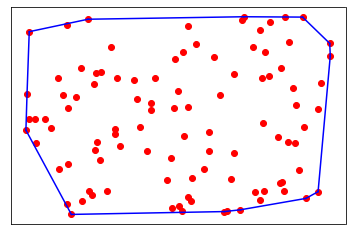

In [23]:
upper.extend(lower)
print("Upper and lower hulls joined")
print_points_sequence(upper)
draw_hull(upper)
plt.show()